In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import os
import env
import acquire as a
import prepare as p
import wrangle as w
from sklearn.model_selection import train_test_split

#Stats imports
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind, chi2_contingency


#visual imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scalers
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# modeling method
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
data('iris',show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [3]:
# Get Iris Data
df = a.get_iris_data()
df.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
species_id,,,,,,
1,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
1,3,4.7,3.2,1.3,0.2,setosa


# Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.

## A. Choose features other than the ones used in the lesson.


- petal_width

- sepal_width

In [4]:
# Data Split
train, val, test = p.split_data_continious(df)
train.shape, val.shape, test.shape

((84, 6), (36, 6), (30, 6))

## Visualize the results of your clustering.


In [5]:
# Subset of train
X = train[['sepal_width','petal_width']]
X.head(3)

,sepal_width,petal_width
species_id,,
2,3.3,1.6
1,3.5,0.3
2,3.2,1.8


In [6]:
# Kmeans Model Object, Fit, and Predict
km = KMeans(n_clusters=3)

km.fit(X)

km.predict(X)

array([2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2], dtype=int32)

In [7]:
# Centroids
centroids = pd.DataFrame(km.cluster_centers_, columns=X.columns)
centroids.head()

,sepal_width,petal_width
0,2.614815,1.240741
1,3.440000,0.260000
2,3.056250,1.931250


In [8]:
# New column on X df
X['unscaled_preds'] = km.predict(X)
X.head(3)

,sepal_width,petal_width,unscaled_preds
species_id,,,
2,3.3,1.6,2
1,3.5,0.3,1
2,3.2,1.8,2


<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

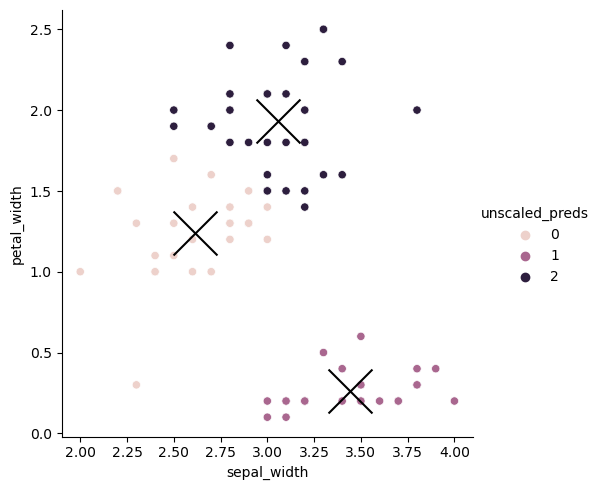

In [9]:
# relplot with cluster hue. uscaled.
sns.relplot(x='sepal_width', y='petal_width', data=X, hue='unscaled_preds')

centroids.plot.scatter(x='sepal_width', y='petal_width', c='black', marker='x',\
                       s=1000, ax=plt.gca())

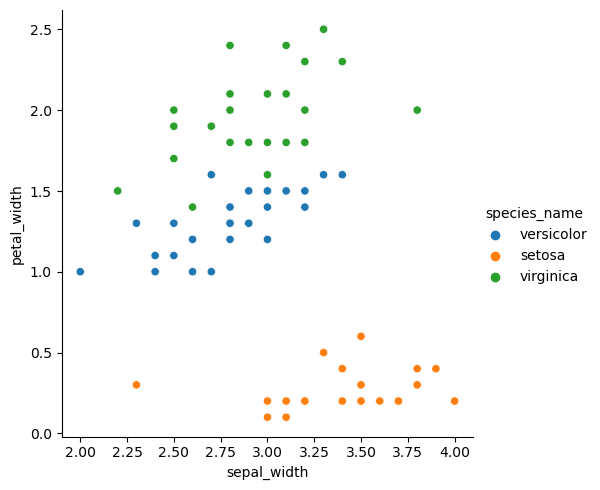

In [10]:
# relplot of actual values
sns.relplot(x='sepal_width', y='petal_width', data=train, hue='species_name')

In [11]:
# Scaling data
mm = MinMaxScaler()
 
X[['sepal_width','petal_width']] = mm.fit_transform(X[['sepal_width','petal_width']])

In [12]:
km_scaled = KMeans(n_clusters=3)

km_scaled.fit(X)

km_scaled.predict(X)

array([1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1], dtype=int32)

In [13]:
# Scaled preds
X['scaled_preds'] = km_scaled.predict(X)

In [14]:
X.head(3)

,sepal_width,petal_width,unscaled_preds,scaled_preds
species_id,,,,
2,0.65,0.625000,2,1
1,0.75,0.083333,1,2
2,0.60,0.708333,2,1


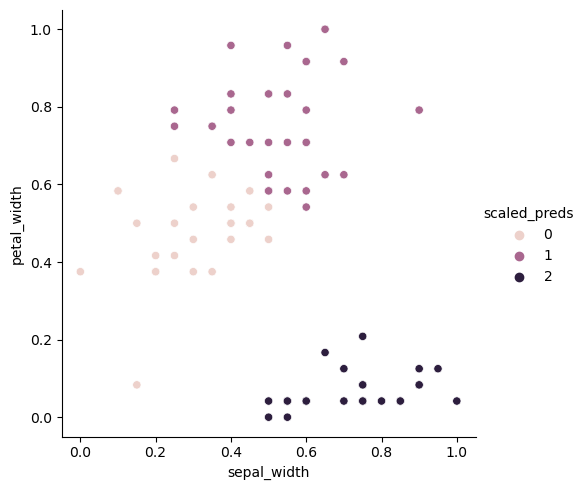

In [15]:
# relplot with cluster hue. scaled.
sns.relplot(x='sepal_width', y='petal_width', data=X, hue='scaled_preds')

## Use the elbow method to visually select a good value for k.


In [16]:
km.inertia_

11.62675925925926

In [17]:
inertia = [] 

seed = 123

for n in range(1,11):
    
    km = KMeans(n_clusters=n, random_state=seed)
    
    km.fit(X[['sepal_width','petal_width']])
    
    inertia.append(km.inertia_)

inertia

[11.533429232804233,
 4.356952549366342,
 2.498206605222734,
 1.8922615470467032,
 1.508984898883796,
 1.1386594386972675,
 1.0073637647075144,
 0.8239732218013467,
 0.7221348231244064,
 0.6121703770766269]

In [18]:
inertia_df = pd.DataFrame({'n_clusters': list(range(1,11)), 'inertia': inertia})
inertia_df.head(5)

,n_clusters,inertia
0,1,11.533429
1,2,4.356953
2,3,2.498207
3,4,1.892262
4,5,1.508985


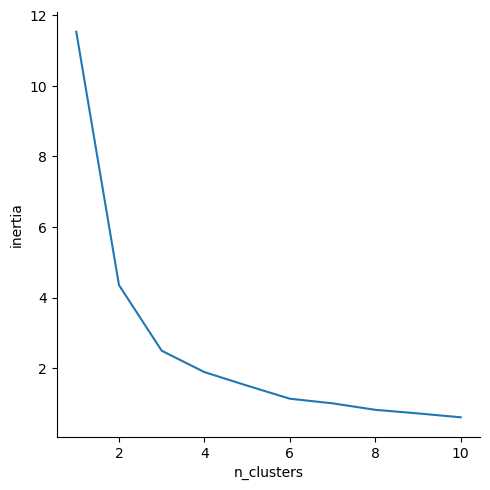

In [19]:
sns.relplot(x='n_clusters', y='inertia', data=inertia_df, kind='line')

**Takeaways:**

- Elbow = 3 clusters

## Repeat the clustering, this time with 3 different features.

In [20]:
train.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
species_id,,,,,,
2,57,6.3,3.3,4.7,1.6,versicolor
1,41,5.0,3.5,1.3,0.3,setosa
2,71,5.9,3.2,4.8,1.8,versicolor


In [21]:
# Subset of train
xx = train[['sepal_width','petal_width','petal_length']]
xx.head(3)

,sepal_width,petal_width,petal_length
species_id,,,
2,3.3,1.6,4.7
1,3.5,0.3,1.3
2,3.2,1.8,4.8


In [22]:
# Scaler Object
minmax = MinMaxScaler()

In [23]:
# Fit and Transform
xx[['sepal_width','petal_width','petal_length']] =\
minmax.fit_transform(xx[['sepal_width','petal_width','petal_length']])

In [24]:
# head of scaled xx
xx.head(3)

,sepal_width,petal_width,petal_length
species_id,,,
2,0.65,0.625000,0.649123
1,0.75,0.083333,0.052632
2,0.60,0.708333,0.666667


In [25]:
kmm = KMeans(n_clusters=3)

kmm.fit(xx)

xx['scaled_preds'] = kmm.predict(xx)

xx.head(3)

,sepal_width,petal_width,petal_length,scaled_preds
species_id,,,,
2,0.65,0.625000,0.649123,2
1,0.75,0.083333,0.052632,1
2,0.60,0.708333,0.666667,2


### Three Cluster Graphs

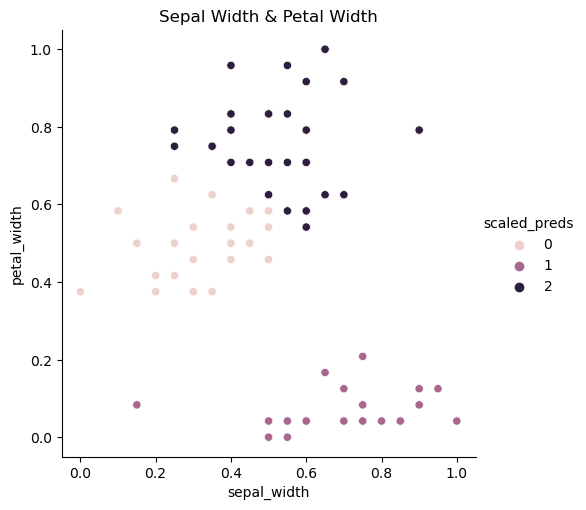

In [26]:
# relplot of sepal_width x petal_width
sns.relplot(x='sepal_width', y='petal_width', data=xx, hue='scaled_preds')
plt.title('Sepal Width & Petal Width')
plt.show()

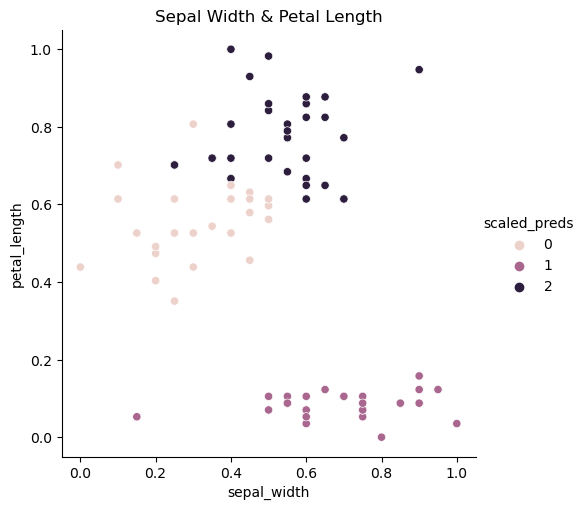

In [27]:
# replot of sepal_width x petal_length
sns.relplot(x='sepal_width', y='petal_length', data=xx, hue='scaled_preds')
plt.title('Sepal Width & Petal Length')
plt.show()

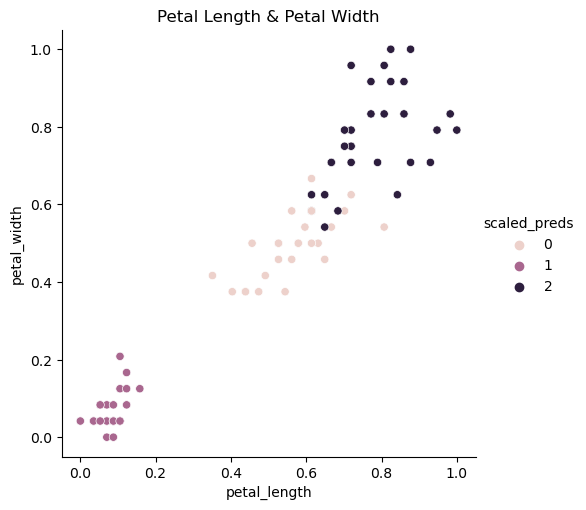

In [28]:
# replot of sepal_width x petal_width
sns.relplot(x='petal_length', y='petal_width', data=xx, hue='scaled_preds')
plt.title('Petal Length & Petal Width')
plt.show()

# Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [41]:
# Acquired mall data
mall = a.get_mall()
mall.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [42]:
# Dropped customer_id
mall.drop(['customer_id'], axis=1, inplace=True)

In [43]:
# Dummies
mall = pd.get_dummies(mall, columns=['gender'], drop_first=True)

In [45]:
mall.head(3)

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0


In [44]:
# X
X = mall

In [46]:
# Scaling stuff
mm = MinMaxScaler()

X[['age','annual_income','spending_score','gender_Male']] =\
mm.fit_transform(X[['age','annual_income','spending_score','gender_Male']])

In [47]:
X.head(3)

,age,annual_income,spending_score,gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0


In [57]:
# Scaler Object, Fit Object, Predict stuff
km = KMeans(n_clusters=3, random_state=123)

km.fit(X[['age','annual_income']])

X['preds'] = km.predict(X[['age','annual_income']])
X.head(3)

,age,annual_income,spending_score,gender_Male,preds
0,0.019231,0.000000,0.387755,1.0,0
1,0.057692,0.000000,0.816327,1.0,0
2,0.038462,0.008197,0.051020,0.0,0


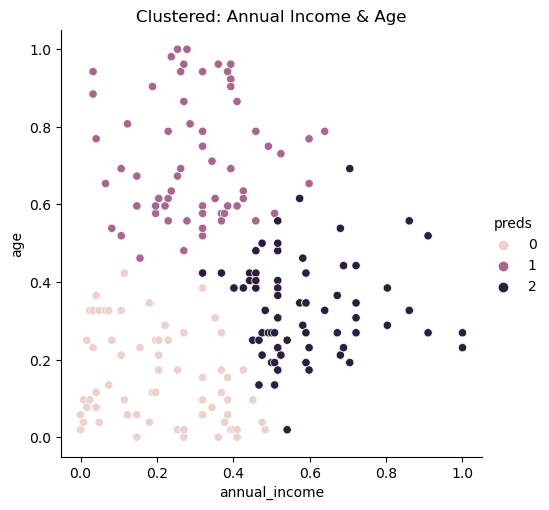

In [58]:
sns.relplot(x='annual_income', y='age', data=X, hue='preds')
plt.title('Clustered: Annual Income & Age')
plt.show()

In [59]:
# Inertia for loop
inertia = [] 

seed = 123

for n in range(1,11):
    
    km = KMeans(n_clusters=n, random_state=seed)
    
    km.fit(X[['age','annual_income']])
    
    inertia.append(km.inertia_)

inertia

[23.583906150363603,
 13.02893842801829,
 7.492107868586012,
 6.0728847287425545,
 4.713025598595381,
 3.8551355763290687,
 3.0547174363693586,
 2.642520343536072,
 2.3135720353543285,
 2.09434392859823]

In [60]:
# Inertia df
inertia_df = pd.DataFrame({'n_clusters': list(range(1,11)), 'inertia': inertia})
inertia_df.head(5)

,n_clusters,inertia
0,1,23.583906
1,2,13.028938
2,3,7.492108
3,4,6.072885
4,5,4.713026


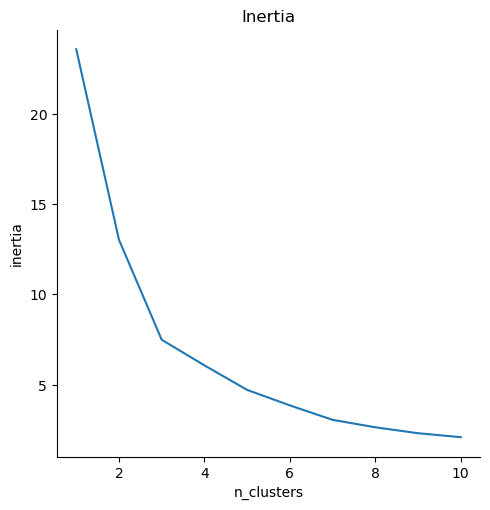

In [62]:
# relplot to find elbow with inertia
sns.relplot(x='n_clusters', y='inertia', data=inertia_df, kind='line')
plt.title('Inertia')
plt.show()

**Elbow: 3 clusters**

# How does scaling impact the results of clustering?



Gives equal weight to the values. This important when choosing number of k's with inertia, since inertia is a measure of distance that uses the sum of squared distances.